In [10]:
#importing pandas package
import pandas as pd
import numpy as np
from pandas import datetime
#Importing the classification_report,confusion_matrix from sklearn.metrics package
from sklearn.metrics import classification_report,confusion_matrix

path_to_projectData = 'Data/' #input path where the data of the project resides
train_data_df = pd.read_csv(path_to_projectData + 'training_data_2_csv_UTF.csv') #reading the bots_data.csv file

#Selecting few columns from the train dataframe
train_data= train_data_df[['followers_count','friends_count','listedcount','favourites_count','verified','statuses_count'
                           ,'screen_name','description','created_at','location']]


test_data_df= pd.read_csv(path_to_projectData + 'test_data_4_students.csv')
test_data_df.head(10)

#Selecting non NaN rows from the test dataset
test_data_df=test_data_df.head(575)
#Selecting few columns from the test dataframe
test_data=test_data_df[['followers_count','friends_count','listed_count','favorites_count','verified','statuses_count',
                        'screen_name','description','created_at','location']]

train_data_df
X_new_train=train_data


In [11]:
#Preprocessing and cleaning of training data

train_data['followers_count']=train_data['followers_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
train_data['friends_count']=train_data['friends_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
train_data['listedcount']=train_data['listedcount'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
train_data['favourites_count']=train_data['favourites_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
train_data['verified']=train_data['verified'].apply(lambda x: 0 if x==False else 1 if x==True else -1)
train_data['description']=train_data['description'].apply(lambda x: "" if type(x)==float else "" if x=='NaN'
                                                          else "" if x=='None' else x)
train_data['is_bot_screenname']=0
train_data['is_bot_screenname'] = train_data['screen_name'].apply(lambda x:1 if 'bot' in x  else 1 if 'Bot' in x  else 1 
                                                                   if 'BOT' in x else 0)
train_data['is_bot_description']=0
train_data['is_bot_description'] = train_data['description'].apply(lambda x:1 if 'bot' in x  else 1 if 'Bot' in x  else 1 
                                                                   if 'BOT' in x else 0)

train_data['location']=train_data['location'].apply(lambda x: "" if type(x)==float else "" if x=='NaN'
                                                          else "" if x=='None' else x)

train_data['is_bot_location'] = 0
train_data['is_bot_location'] = train_data['location'].apply(lambda x:0 if x=="" else len(x))


#Duplicating the train_data frame into new DataFrame
train_data_new = train_data.copy()

#Check whether there are null values in 'created_at' column name
pd.isnull(train_data_new['created_at']).values.any()


#Stripping the quotes across the created_at column
train_data_new['created_at'] = train_data_new['created_at'].map(lambda x: x.lstrip('"').rstrip('"'))

#Converting the created_at column to pandas datetime format
train_data_new['created_at'] = pd.to_datetime(train_data_new['created_at'])

#Creating new column called age to calculate the Age of the profile 
train_data_new['age']=0

time_stamp_now= datetime.now()

#Calculating the age of the profile by subtracting it with the current date 
train_data_new['age']=time_stamp_now.date()-train_data_new['created_at']

#Converting the age of profile to days i.e in numeric format
train_data_new['age']=train_data_new['age'].astype('timedelta64[D]')
train_data['age']=train_data_new['age']


#train_data['friends_by_followers'] = train_data.friends_count/train_data.followers_count
#Dropping the created_at column from train_data Frame
train_data.drop('created_at',axis=1, inplace=True)
train_data.drop('description', axis=1, inplace=True)
train_data.drop('screen_name', axis=1, inplace=True)
train_data.drop('location', axis=1, inplace=True)




X_train = train_data
Y_train= train_data_df['bot']

/home/shivraj/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/shivraj/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/shivraj/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [12]:
#Preprocessing and cleaning of test data

test_data['followers_count']=test_data['followers_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
test_data['friends_count']=test_data['friends_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
test_data['listed_count']=test_data['listed_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
test_data['favorites_count']=test_data['favorites_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
test_data['verified']=test_data['verified'].apply(lambda x: 0 if x=='FALSE' else 1 if x=='TRUE' else -1)
test_data['is_bot_screenname']=0
test_data['is_bot_screenname'] = test_data['screen_name'].apply(lambda x:len(x) if 'bot' in x  else len(x) if 'Bot' in x  else len(x) 
                                                                   if 'BOT' in x else 0)

test_data['is_bot_description']=0
test_data['description']=test_data['description'].apply(lambda x: "" if type(x)==float else "" if x=='NaN' else ""
                                                        if x=='None' else x)

test_data['is_bot_description'] = test_data['description'].apply(lambda x:len(x) if 'bot' in x  else len(x) if 'Bot' in x  else len(x) 
                                                                   if 'BOT' in x else 0)



test_data['location']=test_data['location'].apply(lambda x: "" if type(x)==float else "" if x=='NaN'
                                                          else "" if x=='None' else x)
test_data['is_bot_location'] = 0
test_data['is_bot_location'] = test_data['location'].apply(lambda x:0 if x=="" else len(x))


#Stripping the quotes across the created_at column
test_data['created_at'] = test_data['created_at'].map(lambda x: x.lstrip('"').rstrip('"'))

#Converting the created_at column to pandas datetime format
test_data['created_at'] = pd.to_datetime(test_data['created_at'])

test_data_new = test_data.copy()
#Creating new column called age to calculate the Age of the profile 
test_data_new['age']=0

#test_data['friends_by_followers'] = test_data.friends_count/test_data.followers_count


time_stamp_now= datetime.now()


#Calculating the age of the profile by subtracting it with the current date
test_data_new['age']=time_stamp_now.date()-test_data_new['created_at']

#Converting the age of profile to days i.e in numeric format
test_data_new['age']=test_data_new['age'].astype('timedelta64[D]')
test_data['age']=test_data_new['age']

#Dropping the created_at column from train_data Frame
test_data.drop('created_at',axis=1, inplace=True)



test_data['followers_count'].fillna(0,inplace=True)
test_data['friends_count'].fillna(0,inplace=True)
test_data['listed_count'].fillna(0,inplace=True)
test_data['favorites_count'].fillna(0,inplace=True)
test_data['verified'].fillna(-1,inplace=True)
test_data['statuses_count'].fillna(0,inplace=True)
test_data.drop('screen_name', axis=1, inplace=True)
test_data.drop('description', axis=1, inplace=True)
test_data.drop('location',axis=1, inplace=True)

X_test=test_data

X_train



/home/shivraj/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/shivraj/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/shivraj/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

,followers_count,friends_count,listedcount,favourites_count,verified,statuses_count,is_bot_screenname,is_bot_description,is_bot_location,age
0,1291,0,10,0,0,78554,0,0,13,125.0
1,1,349,0,38,0,31,0,0,25,461.0
2,1086,0,14,0,0,713,1,1,0,534.0
3,33,0,8,0,0,676,0,0,0,802.0
4,11,745,0,146,0,185,0,0,21,857.0
5,1,186,0,0,0,11,0,0,10,55.0
6,193,0,19,0,0,6068,0,1,13,1096.0
7,8227,2,89,26,0,2597,0,1,0,689.0
8,275,0,17,23,0,9922,0,1,0,833.0
9,51,3,9,0,0,2515,0,0,0,670.0


In [4]:
###Generating the output file for submission to kaggle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

rfc= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=42)
rfc.fit(X_train,Y_train)
rfc_predictions=rfc.predict(X_test)
rfc_predictions

test_data['bot'] = np.array(rfc_predictions)

result = pd.DataFrame(test_data_df['id'])

result  = result.astype(np.int64)
result['bot'] = test_data['bot']
result
print (result['id'].dtype)
print (result['bot'].dtype)
print (result)

result.to_csv('output_new33.csv',  index=False)


int64
int64
                     id  bot
0            2281292622    0
1            2344040251    0
2             765871267    0
3            4772373433    0
4            1324548560    1
5            2561341789    1
6             347810134    1
7             856303860    1
8    832875000000000000    1
9              88856792    0
10   713557000000000000    1
11           1566746503    0
12             90420314    0
13            184910040    0
14            157690631    0
15             42420346    0
16             42382447    0
17             43993280    0
18           2305236733    1
19   742794000000000000    1
20             31348594    0
21            122085859    0
22             23573083    0
23             43152482    0
24            188857501    0
25           2911272579    0
26             35094637    0
27            146252766    0
28             85430866    0
29             55117855    0
..                  ...  ...
545  731201000000000000    1
546           612754791    1
54

/home/shivraj/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
#Using 5 fold cross validation to check accuracy of RFC model
from sklearn.cross_validation import cross_val_score
accuracyScore = cross_val_score(rfc,X_train, Y_train, cv=5, scoring='accuracy')
print("Accuracy = ",accuracyScore.mean())

/home/shivraj/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy =  0.921344136939


In [6]:
#Using training data to evaluate the model.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.15,random_state=50)
rfc= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=42)
rfc.fit(X_train,Y_train)
rfc_predictions=rfc.predict(X_test)
rfc_predictions

#Printing the Confusion Matrix and Classification Report for RandomForestClassifier
#print
print(confusion_matrix(Y_test,rfc_predictions))
print('\n')
print(classification_report(Y_test,rfc_predictions))
print("accuracy score: {} ".format(accuracy_score(Y_test, rfc_predictions)))  
print("AUC: {}".format(roc_auc_score(Y_test,rfc_predictions)))

[[208  15]
 [ 20 177]]


             precision    recall  f1-score   support

          0       0.91      0.93      0.92       223
          1       0.92      0.90      0.91       197

avg / total       0.92      0.92      0.92       420

accuracy score: 0.9166666666666666 
AUC: 0.9156062916846874


In [7]:
#Checking for top 3 features
from sklearn.feature_selection import RFE
rfe = RFE(rfc, 3)
fit = rfe.fit(X_train, Y_train)
print("Num Features: {}".format( fit.n_features_))
print("Selected Features:{}".format(fit.support_))
print("Feature Ranking: {}".format( fit.ranking_))

print(rfc.feature_importances_)

Num Features: 3
Selected Features:[ True  True False False False False False False False  True]
Feature Ranking: [1 1 5 2 4 3 8 7 6 1]
[ 0.0989613   0.16304229  0.05704616  0.09374155  0.08134576  0.07459192
  0.00959029  0.02213993  0.02360453  0.37593628]


Feature ranking:
1. Feature 9 (0.350076)
2. Feature 4 (0.152645)
3. Feature 3 (0.079035)
4. Feature 7 (0.077435)
5. Feature 1 (0.071741)
6. Feature 5 (0.071428)
7. Feature 0 (0.061609)
8. Feature 8 (0.052398)
9. Feature 2 (0.047508)
10. Feature 6 (0.036126)


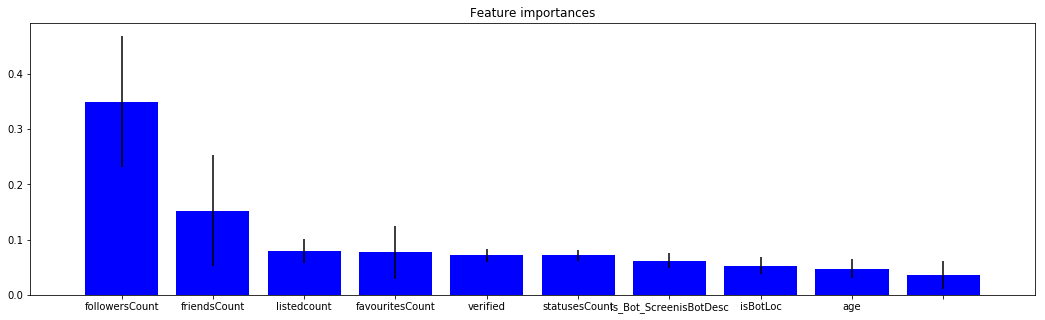

In [13]:
#Feature rankings and scores
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X= X_new_train
y= Y_train

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
#feature names array
fnames=['followersCount' ,'friendsCount' ,'listedcount' ,'favouritesCount', 'verified', 'statusesCount' ,'is_Bot_Screen' 'isBotDesc', 'isBotLoc' ,'age']
# Plot the feature importances of the forest
plt.figure(figsize=(18,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]),fnames )
plt.xlim([-1, X.shape[1]])
plt.show()

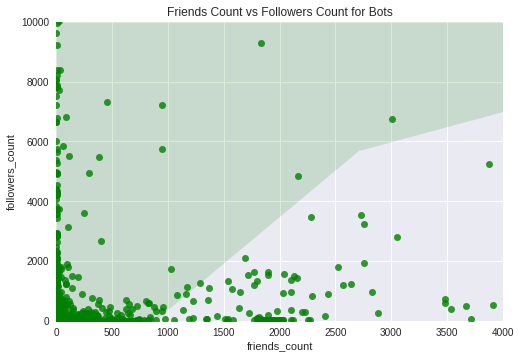

In [14]:
#importing matplot lib and seaborn library
import matplotlib.pyplot as plt
import seaborn as sns

bots = train_data[train_data_df.bot==1]
non_bots = train_data[train_data_df.bot==0]

#Plotting a graph to check if there is a correlation between Friends Count and Followers count for bots
plt.figure()
plt.title('Friends Count vs Followers Count for Bots')
sns.regplot(bots.friends_count, bots.followers_count,color='green', label='bots')
plt.xlim(0, 4000)
plt.ylim(0, 10000)
plt.show()





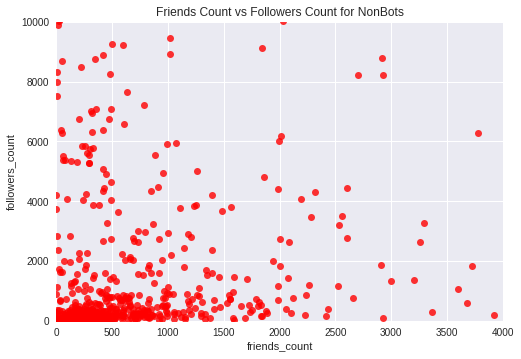

In [15]:
#Plotting a graph to check if there is a correlation between Friends Count and Followers count for nonbots
plt.title('Friends Count vs Followers Count for NonBots')
sns.regplot(non_bots.friends_count, non_bots.followers_count, color='red', label='nonBots')
plt.xlim(0, 4000)
plt.ylim(0, 10000)
plt.show()

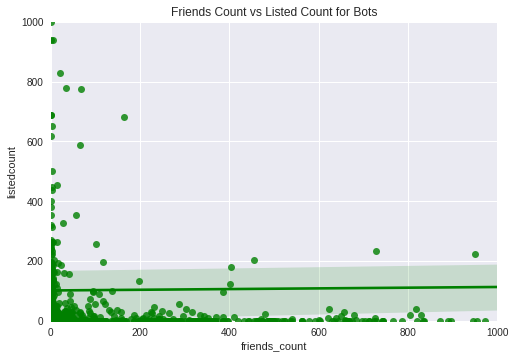

In [16]:
#Plotting a graph to check if there is a correlation between Friends Count and Listed count for bots
plt.figure()
plt.title('Friends Count vs Listed Count for Bots')
sns.regplot(bots.friends_count, bots.listedcount, label='bots',color='green')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.show()

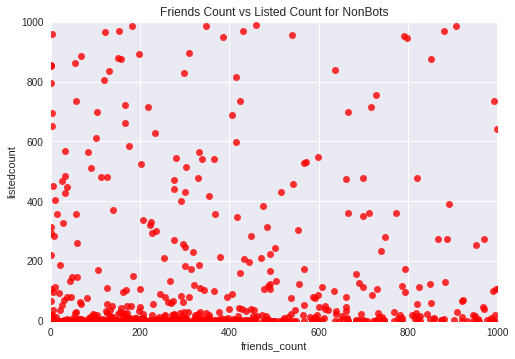

In [17]:
#Plotting a graph to check if there is a correlation between Friends Count and Followers count for nonbots
plt.title('Friends Count vs Listed Count for NonBots')
sns.regplot(non_bots.friends_count, non_bots.listedcount, label='nonBots',color='red')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.show()

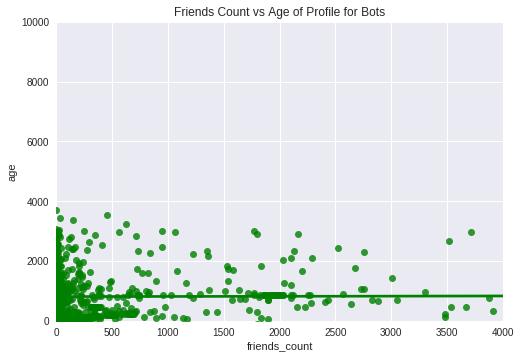

In [18]:
#Plotting a graph to check if there is a correlation between Friends Count and age of profile for bots
plt.figure()
plt.title('Friends Count vs Age of Profile for Bots')
sns.regplot(bots.friends_count, bots.age,color='green', label='bots')
plt.xlim(0, 4000)
plt.ylim(0, 10000)
plt.show()

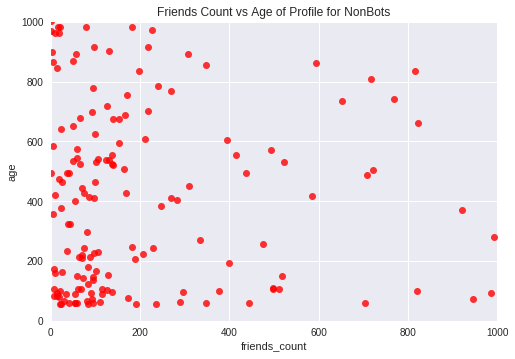

In [19]:
#Plotting a graph to check if there is a correlation between Friends Count and Age of profile for nonbots
plt.title('Friends Count vs Age of Profile for NonBots')
sns.regplot(non_bots.friends_count, non_bots.age, label='nonBots',color='red')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.show()